<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Overview</a></span></li><li><span><a href="#Dimensionality-reduction" data-toc-modified-id="Dimensionality-reduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dimensionality reduction</a></span><ul class="toc-item"><li><span><a href="#Dimensionality-reduction-using-PCA" data-toc-modified-id="Dimensionality-reduction-using-PCA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dimensionality reduction using PCA</a></span></li><li><span><a href="#Dimensionality-reduction-using-t-SNE" data-toc-modified-id="Dimensionality-reduction-using-t-SNE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dimensionality reduction using t-SNE</a></span></li><li><span><a href="#PCA-&amp;-t-SNE" data-toc-modified-id="PCA-&amp;-t-SNE-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>PCA &amp; t-SNE</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Base-Line-Model---Random-Guessing" data-toc-modified-id="Base-Line-Model---Random-Guessing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Base Line Model - Random Guessing</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Random-Forest-Classifier---Using-PCA" data-toc-modified-id="Random-Forest-Classifier---Using-PCA-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Random Forest Classifier - Using PCA</a></span></li></ul></li><li><span><a href="#AdaBoost-Classifier" data-toc-modified-id="AdaBoost-Classifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>AdaBoost Classifier</a></span><ul class="toc-item"><li><span><a href="#AdaBoost-Using-Different-Base-Learners" data-toc-modified-id="AdaBoost-Using-Different-Base-Learners-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>AdaBoost Using Different Base Learners</a></span></li></ul></li></ul></li><li><span><a href="#Classification-Reminder" data-toc-modified-id="Classification-Reminder-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification Reminder</a></span></li></ul></div>

In [ ]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

#%matplotlib inline

In [2]:
test_df = pd.read_csv("fashion-mnist_test.csv")
train_df = pd.read_csv("fashion-mnist_train.csv")

# Data Overview
Fashion MNIST is an MNIST like dataset using images of clothing instead of hand-written digits. Each photo is 28x28 grayscale, with 10 different classes. &ensp; The dataset contains 70000 images with 60000 for training and 10000 for testing.

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
          5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8 : 'Bag', 9 : 'Ankle boot'}

In [83]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [84]:
y_subset_names_full = np.zeros((10000,), dtype=object)
y_subset_names_full.shape

for i in range(len(y_subset)):
 y_subset_names_full[i] = labels[y_test[i]]
y_subset_names_full.shape

(10000,)

In [39]:
print ("X Train",x_train.shape)
print ("X Test",x_test.shape)

print ("Y Train",y_train.shape)
print ("Y Test",y_test.shape)

# The variable y_train contains the labels of every sample marked as integers from 0 to 9.

X Train (60000, 784)
X Test (10000, 784)
Y Train (60000,)
Y Test (10000,)


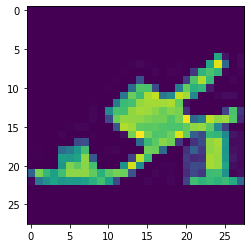

In [7]:
# lets see what a random image look like 
image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

# Dimensionality reduction
## Dimensionality reduction using PCA
PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. <br/>       These newly extracted variables are called Principal Components. 

In [8]:
# we will only sample the first 20,000 so as to not burden the computer
# y_subset 0-9
# x_subset 0 - 783
x_subset = x_train[0:1000]
y_subset = y_train[0:1000]
y_subset_names = np.zeros((1000,), dtype=object)
y_subset_names.shape
#y_subset.shape
#labels
for i in range(len(y_subset)):
 y_subset_names[i] = labels[y_subset[i]]
y_subset_names.shape
# checking that the sub set samples correctly 
new_series = pd.Series(y_subset)
new_series.value_counts(ascending=True)

5.0     83
1.0     89
9.0     91
8.0     96
2.0     99
7.0    102
6.0    106
0.0    108
3.0    112
4.0    114
dtype: int64

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(x_subset)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation for 3 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.28495473 0.17530388 0.06379471]
Cumulative explained variation for 3 principal components: 0.5240533351898193


Text(0.5, 0.98, 'PCA only')

<Figure size 864x288 with 0 Axes>

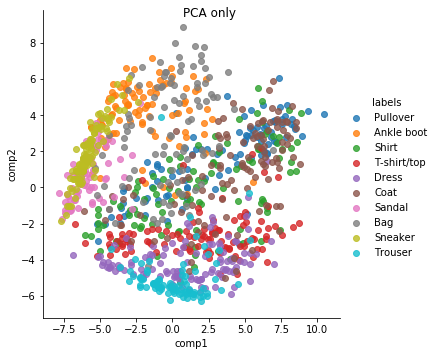

In [10]:
# PCA clustring plot
plt.figure(figsize=(12, 4))

Xdf1 = pd.DataFrame(pca_result)
Xdf1.columns = ['comp1','comp2','comp3']
Xdf1['labels'] = y_subset_names

lm = sns.lmplot('comp1','comp2',hue='labels',data=Xdf1,fit_reg=False)
# Adding a title to the Figure
fig = lm.fig 
fig.suptitle("PCA only", fontsize=12)

Text(0.5, 0.98, '2-Component PCA')

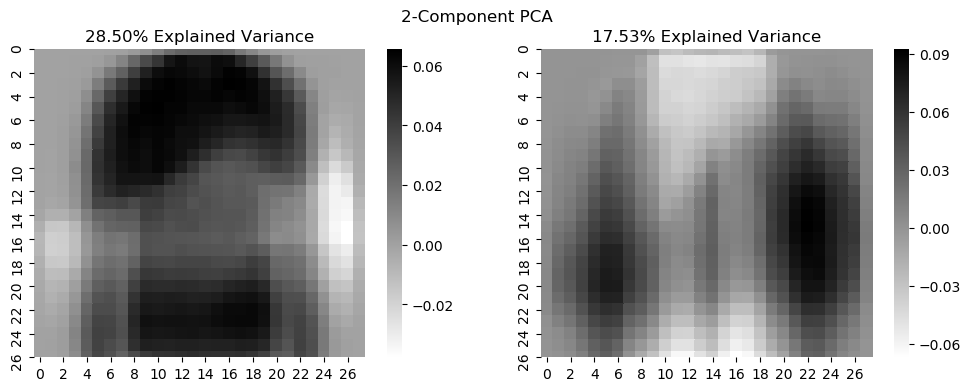

In [11]:
plt.style.use('default')

fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap='gray_r')
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

plt.suptitle('2-Component PCA')

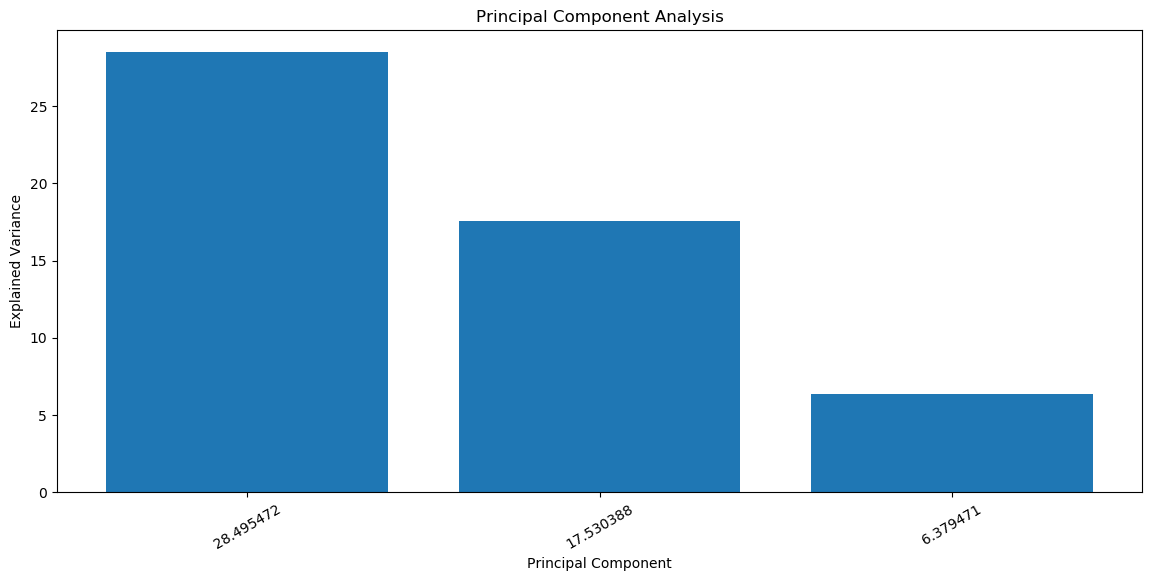

In [12]:
# checking the amount of variance of the data is explained by these three components.
index = np.arange(len(pca.explained_variance_ratio_))
plt.figure(figsize=(14,6))
plt.title('Principal Component Analysis')
plt.bar(index, pca.explained_variance_ratio_*100)
plt.xlabel('Principal Component', fontsize=10)
plt.ylabel('Explained Variance', fontsize=10)
plt.xticks(index, pca.explained_variance_ratio_*100, fontsize=10, rotation=30)
plt.show()

## Dimensionality reduction using t-SNE
t - Distributed Stochastic Neighbor Embedding (t-SNE) <br/>

algoritem explanation: <br/>
The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space.<br/>
It then tries to optimize these two similarity measures using a cost function. <br/>

well see how good the T-SNE weill do compared to the PCA model 

In [ ]:
# t-sne alone 
from sklearn.manifold import TSNE
# we will only sample the sub_set so as to not burden the computer
tsne = TSNE(n_components=2,n_iter=1000)
tsne_alone = tsne.fit_transform(x_subset)

In [ ]:
#Create a data frame
plt.figure(figsize=(12, 4))

Xdf = pd.DataFrame(tsne_alone)
Xdf.columns = ['comp1','comp2']
Xdf['labels'] = y_subset_names
tsneplot = sns.lmplot('comp1','comp2',hue='labels',data=Xdf,fit_reg=False)

fig = tsneplot.fig 
fig.suptitle("T-SNE only", fontsize=12)

## PCA & t-SNE
Scikit-learn's documentation of t-SNE explicitly states that:

It is highly recommended to use another dimensionality reduction method (e.g., PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g., 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.

In [71]:
#PCA AND T-SNE

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
print('pca_result_50 shape:',pca_result_50.shape)

Cumulative explained variation for 50 principal components: 0.8720098733901978
pca_result_50 shape: (1000, 50)


In [ ]:
tsne = TSNE(n_components=3,n_iter=1000,random_state=6)
pca_tsne_result = tsne.fit_transform(pca_result_50)

In [ ]:
# 3D PCA & T-SNE dimensionality reduction analysis
%matplotlib notebook
# setting it to notebook for 3d compability 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_tsne_result[:, 0], pca_tsne_result[:, 1], pca_tsne_result[:, 2], c=y_subset, s=10, cmap="tab10")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

fig.suptitle("PCA & T-SNE 3D", fontsize=12)
plt.show()

In [ ]:
#Create a data frame for PCA & t-SNE
#%matplotlib inline
#%config InlineBackend.figure_format ='retina'

# setting it back to inline for more 2d compability 
Xdf = pd.DataFrame(pca_tsne_result)
Xdf.columns = ['comp1','comp2','comp3']
Xdf['labels'] = y_subset_names
pca_tsne_plot = sns.lmplot('comp1','comp2',hue='labels',data=Xdf,fit_reg=False)

fig = pca_tsne_plot.fig
fig.suptitle("PCA & T-SNE 2D", fontsize=12)


# Models

## Base Line Model - Random Guessing

In [72]:
import random
from sklearn.metrics import accuracy_score
import sklearn
random.seed(30)
y_predicted = [random.randint(0, 9) for p in range(0, len(y_test))]
print('Random Guessing accuracy:',accuracy_score(y_test,y_predicted))

Random Guessing accuracy: 0.0977


## Random Forest Classifier

In [55]:
#from sklearn.model_selection import train_test_split
#df = train_df
#x = df.drop(['label'], axis = 1)
#y = df.iloc[:, 0]
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


In [73]:
print ("X Train",x_train.shape)
print ("X Test",x_test.shape)

print ("Y Train",y_train.shape)
print ("Y Test",y_test.shape)


X Train (60000, 784)
X Test (10000, 784)
Y Train (60000,)
Y Test (10000,)


In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 25, max_depth = 12, random_state = 2)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [42]:
pred = model.predict(x_test)
pred.shape

(10000,)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))

[[845   0  16  40   3   1  84   0  11   0]
 [  1 963   9  19   3   1   3   0   1   0]
 [  9   1 772  10 143   0  58   0   7   0]
 [ 16   6  11 924  25   0  17   0   1   0]
 [  0   1  70  38 846   0  42   0   3   0]
 [  0   0   0   0   0 919   0  54   7  20]
 [189   1 112  32 100   0 554   0  12   0]
 [  0   0   0   0   0  17   0 913   0  70]
 [  1   1  10   2   3   3  10   3 966   1]
 [  0   0   0   0   0   7   1  48   3 941]]


In [91]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      1000
         1.0       0.99      0.96      0.98      1000
         2.0       0.77      0.77      0.77      1000
         3.0       0.87      0.92      0.89      1000
         4.0       0.75      0.85      0.80      1000
         5.0       0.97      0.92      0.94      1000
         6.0       0.72      0.55      0.63      1000
         7.0       0.90      0.91      0.90      1000
         8.0       0.96      0.97      0.96      1000
         9.0       0.91      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [139]:
#y_pred_series = pd.Series(pred, index = y_test)
#y_pred_series.un

In [140]:
incorrect = []
for i in range(len(y_test)):
    if(not pred[i] == y_test[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

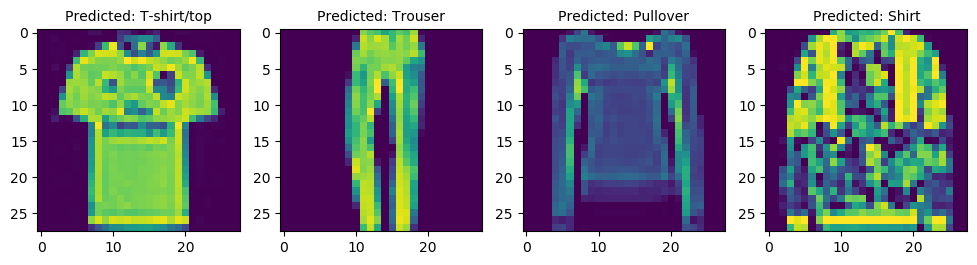

In [142]:
plt.figure(figsize=(12, 4))

for i in range(0, 4):
    plt.subplot(1, 4, i + 1)
    num=i
    i = x_test[i, :].reshape((28, 28))
    num =pred[num]
 
    plt.imshow(i)
    plt.title('Predicted: '+str(labels[num]), fontsize = 10)

### Random Forest Classifier - Using PCA

In [20]:
pca_50_new = PCA(n_components=50)
pca_result_50_new = pca_50.fit_transform(x)

In [21]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(pca_result_50_new, y, test_size = 0.25)

In [22]:
model_with_pca = RandomForestClassifier(n_estimators = 25, max_depth = 12, random_state = 2)
model_with_pca.fit(x_train_pca, y_train_pca)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
pred_with_pca = model_with_pca.predict(x_test_pca)

In [ ]:
print(confusion_matrix(y_test_pca, pred_with_pca))

In [ ]:
print(classification_report(y_test_pca, pred_with_pca))

## AdaBoost Classifier


In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer after dimentionality reduction using PCA
model = abc.fit(x_train_pca, y_train_pca)

#Predict the response for test dataset
y_pred_ada = model.predict(x_test_pca)

In [25]:
print("Accuracy:",accuracy_score(y_test_pca, y_pred_ada))

Accuracy: 0.5779333333333333


### AdaBoost Using Different Base Learners
base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.

In [ ]:
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(x_train_pca, y_train_pca)

#Predict the response for test dataset
y_pred_ada_svc = model.predict(x_test_pca)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test_pca, y_pred_ada_svc))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# Classification Reminder

Precision:

Precision is the ability of a classiifer not to label an instance positive that is actually negative. Basically, it is defined as as the ratio of true positives to the sum of true and false positives. “For all instances classified positive, what percent was correct?”

Recall:

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. “For all instances that were actually positive, what percent was classified correctly?”

F1 Score:

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0 . Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation.

Support:

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.